## P4DS: Assignment 3 (Autumn 2020)

# Data Analysis Project

#### Notebook template design: Brandon Bennett (2020/11/3)

# _Is my Liver Healthy?_


### Project participants:

* Aishwarya Sunderrajan (mm20as2@leeds.ac.uk)

# Project Plan

## The Data (10 marks)

The HCV data set was obtained from https://archive.ics.uci.edu/ml/datasets/HCV+data# and was donated on the 10th of June 2020 by the Centre for Infection Research, Braunschweig, Germany. Therefore, it can be assumed to be in accordance with recent lifestyle habits and pollution levels and is not outdated. The data consisted of 615 samples where each row consisted of data from blood donors and Hepetitis C patients. 14 features were analysed from these samples. It was possible that some blood donors may have had traces of infectious markers indicating hepatitis but displayed little to no symptoms. The presence of HCV could be false positive as antibodies could be leftover from previous infections. Consequently, there is a chance that patients weren't diagnosed properly and the dataset used is not 100% accurate. 

The patient's demographic data (Age and Sex) were combined with their lab data from biochemical test reports (ALB, ALP, ALT, AST, BIL, CHE, CHOL, CREA, GGT and PROT) to create the dataset. A brief summary of the attributes is given in the table below:
<table>
<thead>
<tr><th style="text-align:center;"><b>Attribute<b></th><th style="text-align:center;"><b>Data type<b></th><th style="text-align:center;"><b>Description<b></th></tr>
</thead> 
<tbody>  
    <tr><td style="text-align:left;">X (Patient ID/No.)</td><td style="text-align:left;">Numeric</td><td style="text-align:left;">Identification number of patient</td></tr>
    <tr><td style="text-align:left;">Category</td><td style="text-align:left;">Categorical</td><td style="text-align:left;">The diagnosis of the patient</td></tr>
    <tr><td style="text-align:left;">Age</td><td style="text-align:left;">Numeric</td><td style="text-align:left;">Age of the patient in years</td></tr>
    <tr><td style="text-align:left;">Sex</td><td style="text-align:left;">Categorical</td><td style="text-align:left;">Male or Female</td></tr>
    <tr><td style="text-align:left;">ALB</td><td style="text-align:left;">Numeric</td><td style="text-align:left;">Albumin Blood Test</td></tr>
    <tr><td style="text-align:left;">ALP</td><td style="text-align:left;">Numeric</td><td style="text-align:left;">Alkaline phosphatase</td></tr>
    <tr><td style="text-align:left;">ALT</td><td style="text-align:left;">Numeric</td><td style="text-align:left;">Alanine Transaminase</td></tr>
    <tr><td style="text-align:left;">AST</td><td style="text-align:left;">Numeric</td><td style="text-align:left;">Aspartate Transaminase</td></tr>
    <tr><td style="text-align:left;">BIL</td><td style="text-align:left;">Numeric</td><td style="text-align:left;">Bilirubin</td></tr>
    <tr><td style="text-align:left;">CHE</td><td style="text-align:left;">Numeric</td><td style="text-align:left;">Acetylcholinesterase</td></tr>
    <tr><td style="text-align:left;">CHOL</td><td style="text-align:left;">Numeric</td><td style="text-align:left;">Cholesterol</td></tr>
    <tr><td style="text-align:left;">CREA</td><td style="text-align:left;">Numeric</td><td style="text-align:left;">Creatinine</td></tr>
    <tr><td style="text-align:left;">GGT</td><td style="text-align:left;">Numeric</td><td style="text-align:left;">Gamma-Glutamyl Transferase</td></tr>
    <tr><td style="text-align:left;">PROT</td><td style="text-align:left;">Numeric</td><td style="text-align:left;">Proteins</td></tr>
</tbody>
</table>

Majority of the samples were obtained from blood donors since those were readily accessible. However, this wasn't the case for infected blood. It could be because not everyone infected with the disease got tested for it due to indiscernible symptoms, lack of funds, lack of access to testing facilities etc. 1, 18, 1, 10 and 1 null values were observed in ALB, ALP, CHOL and PROT respectively, null values were imputed by using data median to avoid bias. The Category attribute had values pertaining to '0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis'. These categories can be broken down into two main categories, namely, Infected or Non-Infected as '2=Fibrosis', '3=Cirrhosis' are progressions of hepatitis. Ultimately, these categories were used as the target attribute for classification.

## Project Aim and Objectives (5 marks)
    
The aim of this project is to perform exploratory data analysis to identify errors or outliers in the HCV data set. Relationships and patterns among different variable were sought to be discovered and consequently explore change in strongly related variables with age. Pre-processing is to be performed to fix null values and other anomalies, in order to execute efficient analysis and classification. Samples are to be classified on the basis of if a patient is infected with Hepatitis or not. The diagnosis of the patient was used as the target attribute to classify the samples. Before classification the data is to be transformed and scaled, appropriate sampling method is to be determined as well. The attribute with the highest predictive value was sought to be found using Random Forest Classifier and ultimately evaluate the results. 

### Specific Objectives

* __Objective 1:__ Perform basic exploratory data analysis on HCV data
* __Objective 2:__ Establish relationships between various attributes
* __Objective 3:__ Classify samples as Infected or Non-Infected using decision trees and random tree classifier

## System Design (5 marks)

### Architecture

<img src="architecture.png" alt="drawing" width="600"/>
    
Data was collected from appropriate sources and cleaned and processed for further analysis. Null values and outliers were dealt with to get a clean data set. Exploratory data ananlysis was performed to infer relationships between various attributes and to identify patterns. Data transformations were performed and a model was developed and data was trained using that model. Test data was then used for testing and evaluating the model. Finally, metrics like accuracy, precision and recall were used to evaluate the model.
  
### Processing Modules and Algorithms

* The data was cleaned by converting 'Category' and 'Sex' column values to binary data for ease of classification. Missing values were then imputed with the median of the data to avoid bias in the case of data removal. The 'Unnamed 0' column was dropped as it did not lend any functionality to the overall pipeline of the model.
* Preliminary analysis was carried out and the correlation between all the variables were calculated. The ones showing a strong correlation were plotted against 'Age' to see how age affects the same.
* Since the dataset was imbalanced, a combination of oversampling and under sampling was used to compensate for the data's shortcomings
* Training and test data set were specified and further transformations were done to fit the data to the model.
* Classification was done using Random Forest classifier, a supervised classifier, and the algorithm was evaluated using confusion matrix and precision, accuracy and recall scores.

# Program Code (15 marks)

<b>Exploratory Analysis of Hepatitis C dataset<b>

In [356]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<b>Data Cleaning</b> - Raw .csv data was loaded into a dataframe and some preliminary cleaning was done to make analysis clearer. The first column was dropped and 'Sex' was converted to binary values, 1 as men and 0 as women.

In [357]:
#Data preparation
#Read and load .csv file as a dataframe
hepdf = pd.read_csv('HepatitisCdata.csv')
hepdf.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [358]:
#Cleaning data
#drop Unnamed column and 
hepdf = hepdf.drop('Unnamed: 0', axis = 1)

#convert sex to binary values
sex_map = {'m':1, 'f':0}
hepdf['Sex'] = hepdf['Sex'].map(sex_map)

<b>Dataset Information</b> - More about the dataset was found out by querying the type and count for each variable. The number of null values were also queryed and statistical information about each variable was also found out.

In [359]:
hepdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    int64  
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(2), object(1)
memory usage: 62.6+ KB


In [360]:
hepdf.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [361]:
hepdf.describe()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,47.408130,0.613008,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,10.055105,0.487458,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,19.000000,0.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,0.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,47.000000,1.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,1.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,77.000000,1.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


<b>Visualising data and more cleaning</b> - Frequency of 'Category' types were visualized and was then converted to binary data of the form 1-Infected and 0-Non-Infected. Missing values were filled with the median of the data (because data is fairly skewed) so as to avoid bias. Then the binary 'category' data was plotted using a donut chart.

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


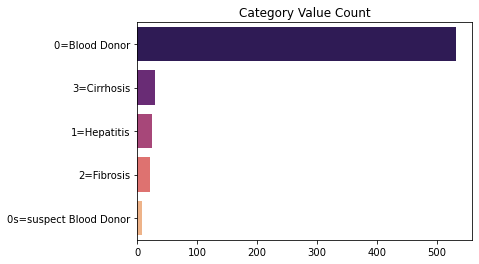

<Figure size 432x288 with 0 Axes>

In [362]:
#Visualising category data
count = dict(hepdf['Category'].value_counts())
labels, values = list(count.keys()), list(count.values())

# create plot
sns.barplot(values, labels, palette = 'magma')
plt.title('Category Value Count')
plt.show()
plt.savefig("cat_val_count.png")

In [363]:
#Changing category to binary data: hepatitis and not hepatitis
hepdf['Category'].loc[hepdf['Category'].isin(["1=Hepatitis","2=Fibrosis", "3=Cirrhosis"])] = 1
hepdf['Category'].loc[hepdf['Category'].isin(["0=Blood Donor", "0s=suspect Blood Donor"])] = 0

D:\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [364]:
#Filling missing values with median of dataset then checking for null values
hepdf.fillna(hepdf.median(), inplace = True)
hepdf.isnull().sum()

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

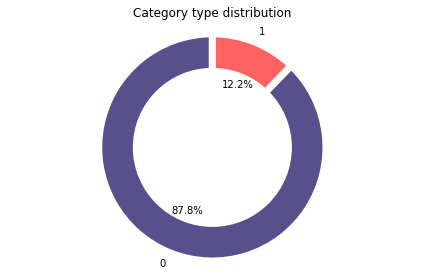

<Figure size 432x288 with 0 Axes>

In [372]:
#Category data piechart
count_edit = dict(hepdf['Category'].value_counts())
labels_ed, values_ed = list(count_edit.keys()), list(count_edit.values())

#colors
colors = ['#58508d','#ff6361']
 
fig1, ax1 = plt.subplots()

ax1.pie(values_ed, colors = colors, labels=labels_ed, autopct='%1.1f%%', startangle=90, wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })

#draw white circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal') 
plt.title('Category type distribution')
plt.tight_layout()
plt.show()
plt.savefig("Category Data.png")

<b>Plotting attribute distributions and finding correlation</b> - Distributions of demographic data were plotted and the correlations were found out with the help of a correlation matrix. Strongly related variables (pearson coefficient > 0.5) were filtered. The scatter plot of these variables were plotted to show the trend and they were also plotted against 'Age'.

In [374]:
count_sex = dict(hepdf['Sex'].value_counts())
count_sex['women'] = count_sex.pop(0)
count_sex['men'] = count_sex.pop(1)

labels_se, values_se = list(count_sex.keys()), list(count_sex.values())

print(count_sex)

{'women': 238, 'men': 377}


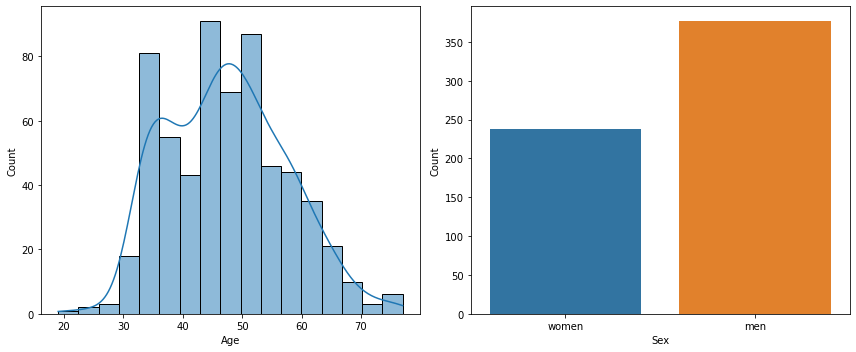

In [375]:
#Distributions of demographic data
fig, axes = plt.subplots(1, 2, squeeze=False, figsize=(12, 5))

sns.histplot(data=hepdf, x="Age", kde=True, ax=axes[0][0])
bar = sns.barplot(x=labels_se, y=values_se, ax=axes[0][1])
bar.set(xlabel='Sex', ylabel='Count')

fig.tight_layout()
fig.savefig('Demographic data distribution')

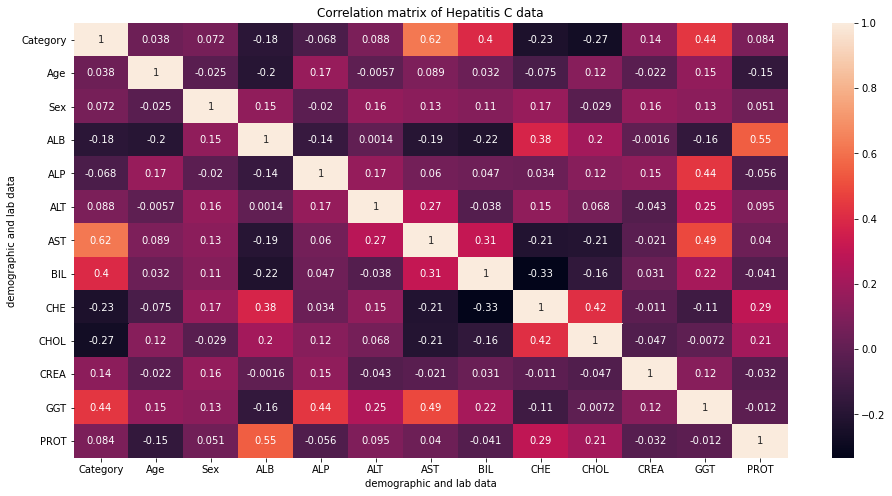

<Figure size 432x288 with 0 Axes>

In [376]:
##Finding correlations between the attributes
corr_mat = hepdf.corr(method='pearson')
plt.figure(figsize=(16,8))
sns.heatmap(corr_mat, annot = True)
plt.title('Correlation matrix of Hepatitis C data')
plt.xlabel('demographic and lab data')
plt.ylabel('demographic and lab data')
plt.show()
plt.savefig('corr_heatmap')

In [377]:
##Interpreting the matrix
corr_pair = corr_mat.unstack()
sorted_corr = corr_pair.sort_values()

#selecting strongly related features
strong_pos = sorted_corr[sorted_corr > 0.5]
strong_neg = sorted_corr[sorted_corr < -0.5]
print('Strong positively related features:' , strong_pos)
print('Strong negatively related features:' , strong_neg)

Strong positively related features: PROT      ALB         0.549975
ALB       PROT        0.549975
AST       Category    0.621724
Category  AST         0.621724
          Category    1.000000
AST       AST         1.000000
CREA      CREA        1.000000
CHOL      CHOL        1.000000
CHE       CHE         1.000000
BIL       BIL         1.000000
ALT       ALT         1.000000
ALP       ALP         1.000000
ALB       ALB         1.000000
Sex       Sex         1.000000
Age       Age         1.000000
GGT       GGT         1.000000
PROT      PROT        1.000000
dtype: float64
Strong negatively related features: Series([], dtype: float64)


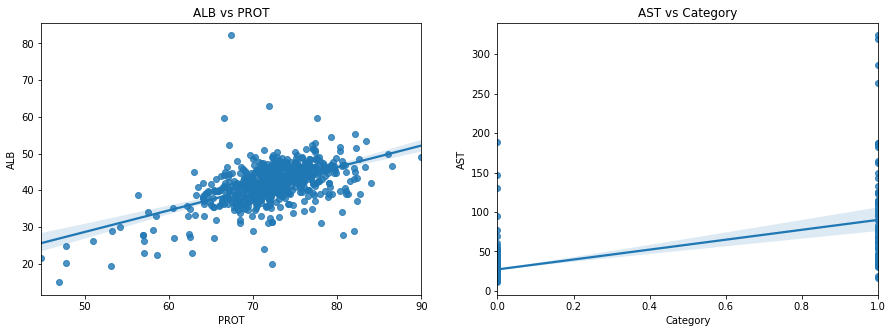

In [378]:
##Plotting graphs for ALB and PROT, AST and Category
fig, axes = plt.subplots(1, 2, squeeze=False, figsize=(15, 5))

sns.regplot(data=hepdf, x="PROT", y="ALB", ax=axes[0][0], scatter = True).set_title('ALB vs PROT')
sns.regplot(data=hepdf, x="Category", y="AST", ax=axes[0][1], scatter = True).set_title('AST vs Category')

fig.savefig('trend_corr')

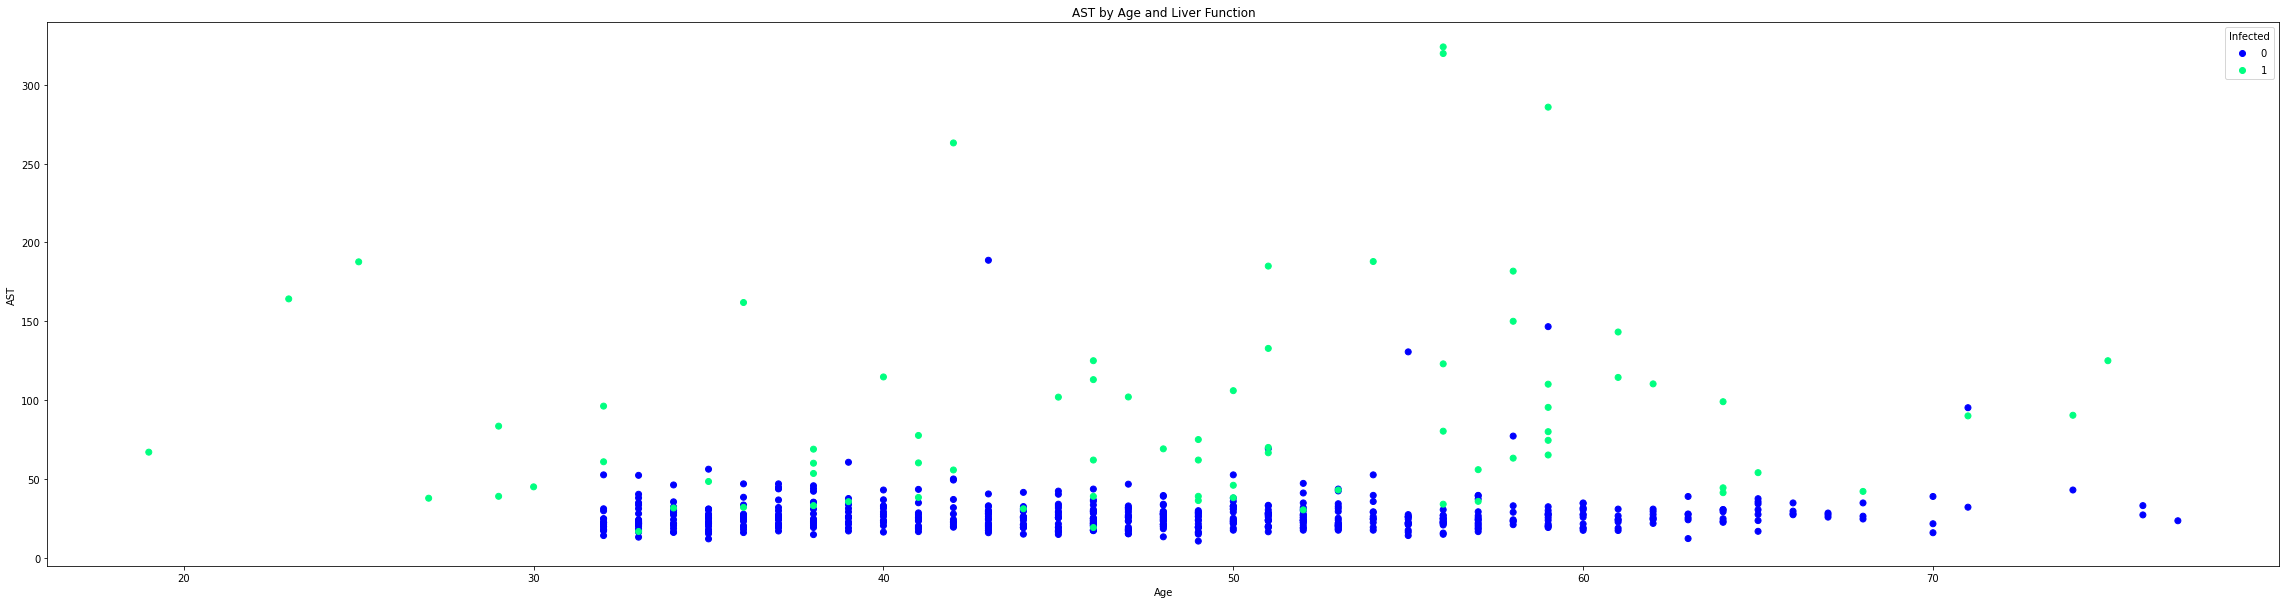

In [380]:
fig,ax= plt.subplots(sharex=True, figsize=(40,10))
fig_data = hepdf.copy()
X = hepdf['Age']
y = hepdf['AST']
scatter = ax.scatter(x=X,y=y,c=hepdf['Category'], cmap='winter')
ax.set(title='AST by Age and Liver Function', xlabel='Age', ylabel='AST')
ax.legend(*scatter.legend_elements(),title='Infected')
fig.savefig('AST_age_liver')

<b>Preprocessing for classification<b>

In [381]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [382]:
hepdf = pd.get_dummies(hepdf, columns = ['Sex'],drop_first=True)
hepdf.head()

,Category,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Sex_1
0,0,32,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,1
1,0,32,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,1
2,0,32,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,1
3,0,32,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,1
4,0,32,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,1


<b>Data transformations and building the model</b> - Dataset was seperated into the categories and the data which is to be classified. The data was then split into training and testing dataset with a 30-test/70-training % split. The sampling method used was stratification to split data into homogenous groups. 

In [383]:
#seperating into classification data and class
X = hepdf.drop(['Category'],axis=1)
y = hepdf["Category"]

In [384]:
#specifying testing and training data set, 30/70% split
#data is split using stratification, random state to control the randomisation
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

Since the dataset is imbalanced, SMOTE - synthetic minority oversampling technique was used. This was used to create more examples for the minority class (Infected in this case). Over sampling and under sampling were performed too to balance out the class distribution.
The resulting training data was then fit into this model and transformed further for optimized results. A method for the creation of confusion matrix was also added for further use.

In [385]:
#SMOTE used since imbalanced dataset and performance on the minority class is the most important
#combining over and under sampling for imbalanced dataset - https://machinelearningmastery.com/combine-oversampling-and-undersampling-for-imbalanced-classification/
over = SMOTE()
over_sam = RandomOverSampler()
under_sam = RandomUnderSampler()

#list of transforms and final estimator to add to the pipeline
steps = [('o', over), ('os', over_sam),('u',under_sam)]
pipeline = Pipeline(steps=steps)

In [386]:
#fit the model and sample with the final estimator
X_train, y_train = pipeline.fit_resample(X_train, y_train)

#Fit training data and transform it
X_train=standard_sc.fit_transform(X_train)

#standardize and center test data
X_test=standard_sc.transform(X_test)

In [388]:
## Method for confusion Matrix 

def conf_mat(y_test,y_test_pred,X):
    #Classify into Non Hepatitis and Hepatitis
    names=['Non Infected','Infected']
    
    #confusion matrix to evaluate the accuracy of binary classification (ground truth, estimated values)
    cm=confusion_matrix(y_test,y_test_pred)
    
    #plot definitions
    fig, ax=plt.subplots(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt=".0f", ax=ax)
    plt.title(X, size = 12)
    plt.xlabel("predicted class")
    plt.ylabel("actual class")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()
    fig.savefig('RFSclassifier')

    return

<b>Applying classification algorithms<b>

Random Forest Classifier was used as the classification algorith due to its high accuracy as it uses multiple decision trees to classify. It does not rely on the importance of a single feature of a single decison tree. On the flipside, Random Forest classifier takes more training time for larger datasets.
The model was trained with the given data and the mean accuracy on test data and labels was found out and confusion matrix plotted. The most important attribute to make decisions was found out with the help of gini index and the top 5 were plotted according to importance.

In [389]:
#Random Forest Classifier fits decision tree classifiers onto sub samples of the dataset
RF = RandomForestClassifier(random_state=42)

#build forest of trees from training set x-train and y-train
RF.fit(X_train, y_train)

#predict class for X
pred = RF.predict(X_test)

#mean accuracy on given test data and labels
score = RF.score(X_test,y_test)
score

0.9783783783783784

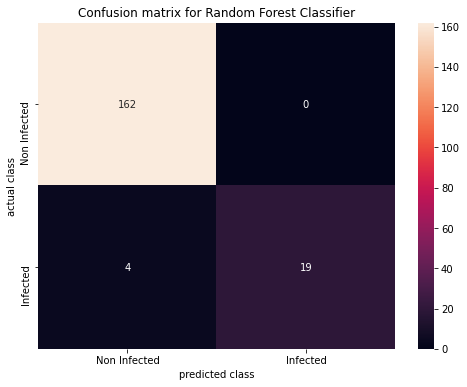

In [390]:
conf_mat(y_test,pred,"Confusion matrix for Random Forest Classifier")

<AxesSubplot:>

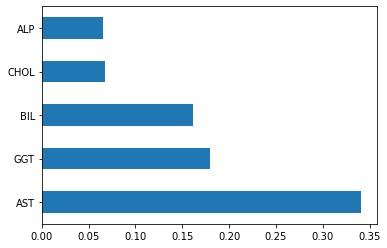

In [393]:
#calculate gini importance. computed as the normalized total reduction of the criterion brought by the feature
feat_importances = pd.Series(RF.feature_importances_, index=hepdf.drop('Category',axis=1).columns)
feat_importances.nlargest(5).plot(kind='barh')


Parameters were defined for the classifier and was then optimized using GridSearchCV (by cross-validation search over a parameter grid). The model was then run using the optimized parameters. It was evaluated using accuracy measures and a confusion matrix.

In [394]:
##Random Forest Classifier with parameters defined
clf = RandomForestClassifier(random_state=42)
params_RF = {
        "max_depth":[250,500,1000],
        "criterion":["gini", "entropy"],
        'min_samples_split': [2,4,6],
        "min_samples_leaf":[1,2,3],
        "max_features":['auto', 'sqrt', 'log2'],
        'warm_start':[True],
        'class_weight':['balanced', 'balanced_subsample']
}

#-1 jobs means it uses all processors, cv-3-fold cross validation in this case
model_RF = GridSearchCV(clf,param_grid=params_RF, cv=3,n_jobs=-1)

#The fit is now run with the optimized parameters
model_RF.fit(X_train,y_train)

D:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:587: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or '


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [250, 500, 1000],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6], 'warm_start': [True]})

In [395]:
#predicting estimators with optimized parameters
y_train_pred_RF = model_RF.predict(X_train)
y_test_pred_RF = model_RF.predict(X_test)

In [396]:
print(classification_report(y_test, y_test_pred_RF))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       162
           1       1.00      0.87      0.93        23

    accuracy                           0.98       185
   macro avg       0.99      0.93      0.96       185
weighted avg       0.98      0.98      0.98       185



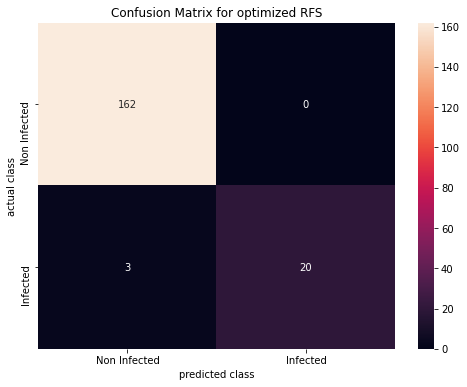

In [398]:
conf_mat(y_test,y_test_pred_RF,"Confusion Matrix for optimized RFS")

# Project Outcome (10+10 marks)

## Overview of Results

Samples were collected from people aged 19 to 77 and mean values for demographic data and lab data was found out. It was noticed that the data was imbalanced with ‘Infected’ as the minority category. AST levels were found to be directly proportional to the Category with infected patients having higher AST levels. It was also noticed that the classifier with optimized parameters classified more accurately according to the confusion matrix. Results are discussed in further detail below:

## Objective 1 - Exploratory data analysis

### Explanation of Results

Samples were collected from people aged 19 to 77 and the mean age was found to be around 47 years. Furthermore, men comprised the majority of sample donors rather than women. The category value count was imbalanced as Blood Donors that weren’t infected formed the majority of the data set, almost 87.8% while infected patients formed 12.2% of the total dataset. Age was found to show a bimodal frequency distribution, with people mostly aged 33-39 and 43-50.

### Visualisation

The frequency distribution of category values before converting it into binary data:
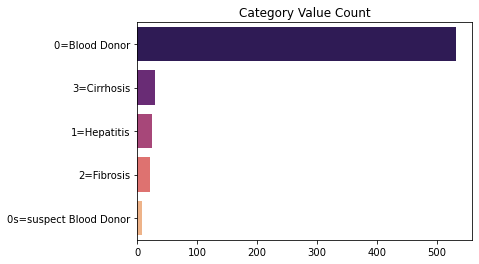



Category data distribution after converting to binary value:
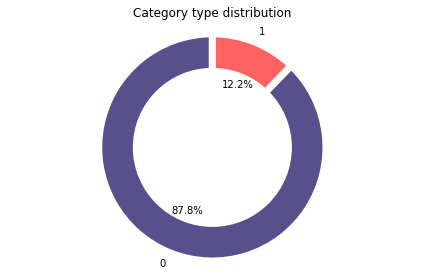



The distribution of Age and Sex in the form of histogram and bar chart respectively:
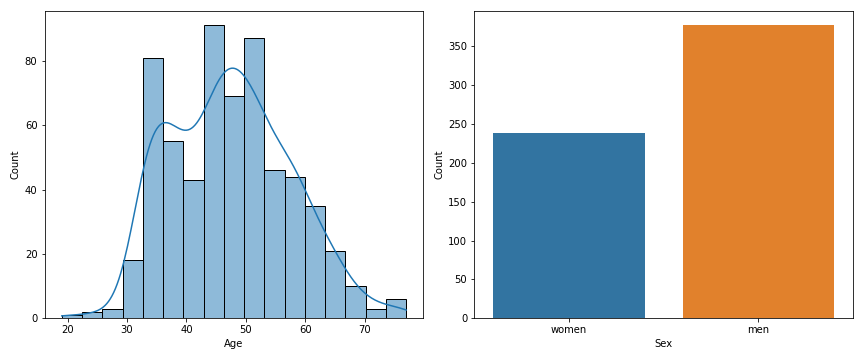



## Objective 2 - Relationship between Attributes
### Explanation of Results

According to the correlation heatmap below, strongly correlated attributes were those that had a Pearson co-efficient greater than 0.5. Albumin and Protein levels had a correlation of 0.55 while Aspartate Transaminase and Category had a correlation of 0.62. Therefore they have a fairly decent linear relationship. The relationship was shown with the help of a scatterplot with the trend line drawn. AST levels were found to be more in infected patients as opposed to those who weren’t infected. The light blue area around the line is the confidence interval of the mean of the predictor value. Since the band is narrow the confidence interval is of a large sample. The change of AST levels with age and liver function was plotted out of curiosity to explore a possible relationship. It was noticed that all patients under the age of 33 were infected and could possibly result in a biased prediction. Higher AST levels were found to be present in the case of people who had Hepatitis.

### Visualisation

Correlation heatmap between all variables in the dataset:
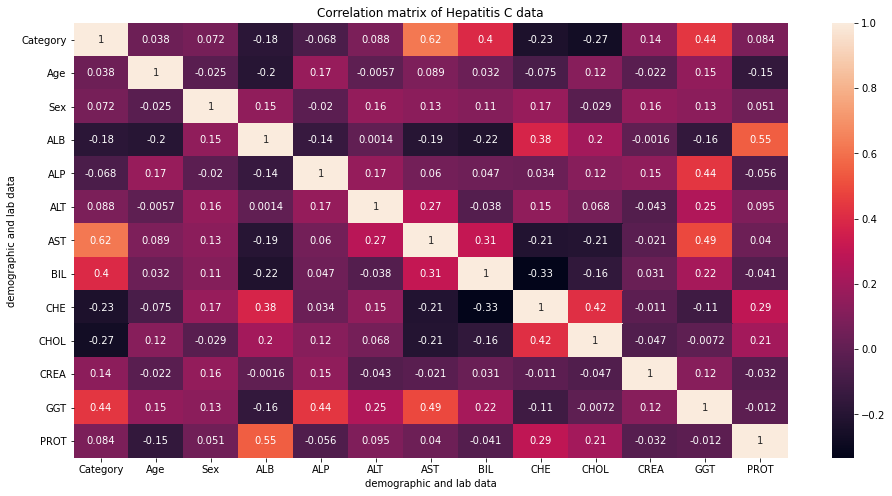


Scatter plot to establish trends between Protein and Albumin and AST and Category:
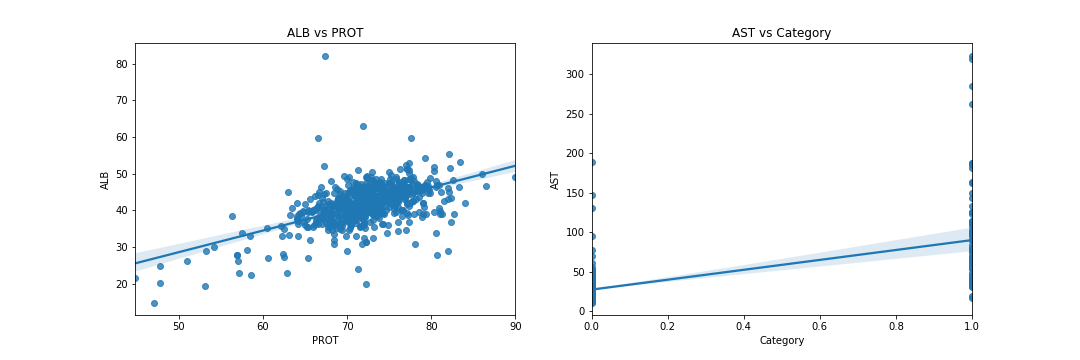


Variation of AST levels with age and liver function:
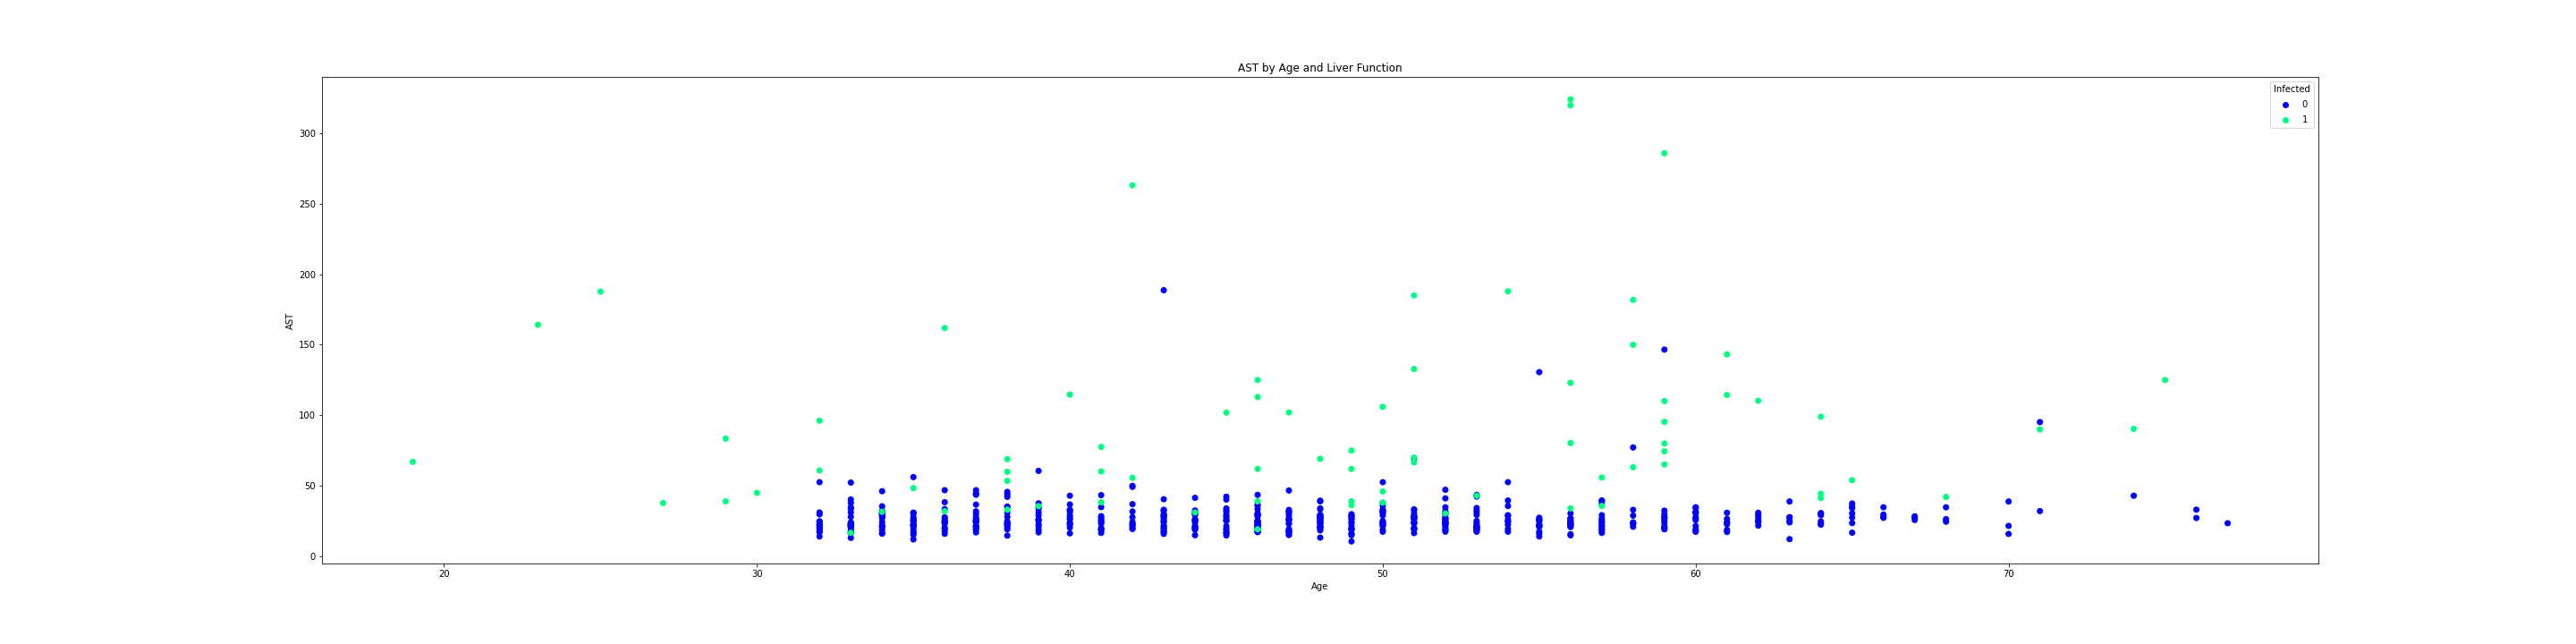



## Objective 3 - Classification
### Explanation of Results

On performing RFS with default parameters the accuracy score on given test data and labels was found to be 0.9783783783783784 i.e. the fraction of predictions the model got correct. It is denoted by no. of correct predictions/total no. of predictions. Here, approximately 97.8 were correct prediction out of a 100 total examples.
The confusion matrix shows that there are 162 true negatives and 19 true positives, resulting in 181 correctly identified instances. There were 0 false positives and 4 false negatives. In this case, 4 false negatives is not preferred as the model is less certain about the presence of hepatitis. In such cases, the presence of infection would be overlooked and could result in further spread of the disease.
AST was found to be the most important feature to predict the category of the patient. Feature importance is also helpful in dimensionality reduction and improves the efficiency of the model. Random Forrest classifier was run again with optimized parameters and resulted in the following table:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       162
           1       1.00      0.87      0.93        23

    accuracy                           0.98       185

The accuracy increased 0.002%. A high precision of 0.98 and 1.00 results in low false positive rate, which does not affect results too much. On the other hand, the number of false negatives decreased by 1. Therefore, the optimized model is slightly better then the non-optimized one. The margin is not big enough to observe a noticeable difference.


### Visualisation

Confusion matrix of unoptimized model
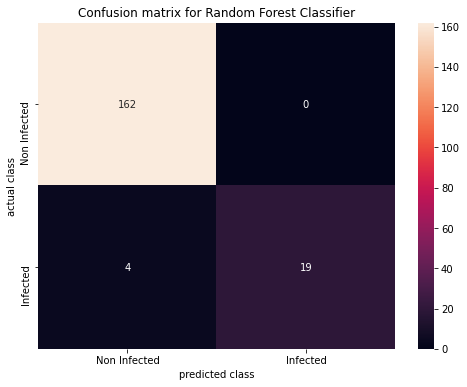

Bar chart showing top 5 important attributes:
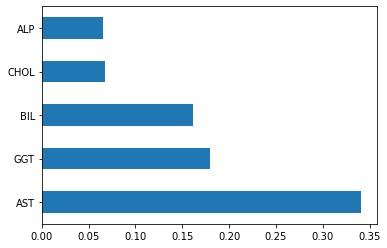

Confusion matrix of optimized model:
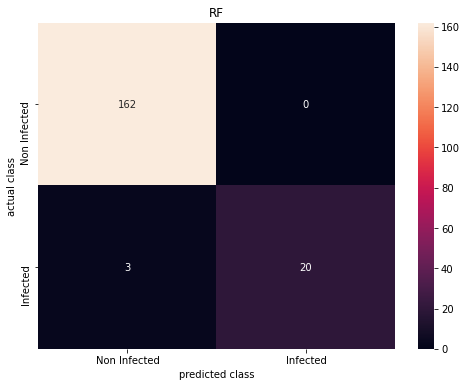

# Conclusion (5 marks)

### Acheivements
As expected AST levels were an important factor in determining weather a patient is infected or not. When the liver is damaged by hepatitis, AST leaks out into the bloodstream and AST levels become elevated. Albumin levels also increased with increased protein levels as the rate of albumin synthesis is greater on higher levels of protein. High levels of albumin could also indicate liver disease. GGT was found to be the second most important feature in classification which is in accordance with the fact that when the liver is damaged, GGT leaks into the bloodstream. Although, it was surprising it did not show strong correlations between other attributes. The model developed, was able to achieve high accuracy and therefore satisfactory results.

### Limitations

Since there weren’t too many strong correlations among attributes, it limits certainty in prediction. This could benefit from a bigger and robust dataset which results in the manifestation of clear trends. Perhaps the data size was not representative of the population. Furthermore, all patients under the age of 33 were infected, resulting in a bias in the data. This could have affected the trend against age and presence of hepatitis. The model did show a few false negatives which could potentially be dangerous in the real world. It could also be possible that the model may display more false negatives in a larger dataset leading to dire consequences. 

### Future Work

Methods to reduce the number of false negatives could be explored in the future along with forming more balanced datasets.